In [1]:
pip install gymnasium


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install stable-baselines3[extra]



  Using cached stable_baselines3-2.6.0-py3-none-any.whl.metadata (4.8 kB)
  Using cached torch-2.7.0-cp312-cp312-win_amd64.whl.metadata (29 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached pygame-2.6.1-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached ale_py-0.11.0-cp312-cp312-win_amd64.whl.metadata (8.4 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
Using cached ale_py-0.11.0-cp312-cp312-win_amd64.whl (3.4 MB)
Using cached torch-2.7.0-cp312-cp312-win_amd64.whl (212.5 MB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Using cached pygame-2.6.1-cp312-cp312-win_amd64.whl (10.6 MB)
Using cached stable_baselines3-2.6.0-py3-none-any.whl (184 kB)
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2


In [1]:

import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt
import numpy as np

# Define the CartPole-v1 environment
env = gym.make('CartPole-v1')



In [2]:
#Training and Evaluation Function
def train_and_evaluate_ppo(env, hyperparameters, timesteps=50000, eval_episodes=100):
    """
    Trains and evaluates a PPO agent on the CartPole-v1 environment with specified hyperparameters.

    Args:
        env: The Gym environment.
        hyperparameters (dict): A dictionary of PPO hyperparameters.
        timesteps (int): The number of training timesteps.
        eval_episodes (int): The number of episodes to evaluate over.

    Returns:
        tuple: (mean_reward, std_reward, episode_rewards)
    """
    model = PPO('MlpPolicy', env, verbose=0, **hyperparameters)
    model.learn(total_timesteps=timesteps)
    
    episode_rewards, _ = evaluate_policy(model, env, n_eval_episodes=eval_episodes, return_episode_rewards=True)
    mean_reward = np.mean(episode_rewards)
    std_reward = np.std(episode_rewards)
    
    print(f"Hyperparameters: {hyperparameters}")
    print(f"Mean reward over {eval_episodes} episodes: {mean_reward:.2f} ± {std_reward:.2f}")
    return mean_reward, std_reward, episode_rewards


In [3]:
#Define Experiments (5–6 Configs)
# Define a few selected hyperparameter configurations
hyperparameter_sets = [
    {'learning_rate': 1e-3, 'gamma': 0.99, 'clip_range': 0.2, 'batch_size': 64},
    {'learning_rate': 1e-4, 'gamma': 0.95, 'clip_range': 0.2, 'batch_size': 128},
    {'learning_rate': 1e-5, 'gamma': 0.9,  'clip_range': 0.1, 'batch_size': 256},
    {'learning_rate': 3e-4, 'gamma': 0.99, 'clip_range': 0.3, 'batch_size': 64},
    {'learning_rate': 1e-4, 'gamma': 0.99, 'clip_range': 0.1, 'batch_size': 128},
    {'learning_rate': 5e-5, 'gamma': 0.95, 'clip_range': 0.2, 'batch_size': 256},
]

results = []


In [4]:
#Run Experiments
# Run Experiments
# Train and evaluate the PPO agent with each set of hyperparameters
for idx, hyperparams in enumerate(hyperparameter_sets):
    print(f"\nRunning experiment {idx+1}/{len(hyperparameter_sets)}")
    
    # Update: Unpack only mean_reward and std_reward
    mean_reward, std_reward, _ = train_and_evaluate_ppo(env, hyperparams)
    
    # Append the results without the episode_rewards
    results.append({
        'hyperparameters': hyperparams,
        'mean_reward': mean_reward,
        'std_reward': std_reward
    })




Running experiment 1/6


C:\Users\hp\anaconda3\anaconda\Lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Hyperparameters: {'learning_rate': 0.001, 'gamma': 0.99, 'clip_range': 0.2, 'batch_size': 64}
Mean reward over 100 episodes: 500.00 ± 0.00

Running experiment 2/6
Hyperparameters: {'learning_rate': 0.0001, 'gamma': 0.95, 'clip_range': 0.2, 'batch_size': 128}
Mean reward over 100 episodes: 328.05 ± 130.33

Running experiment 3/6
Hyperparameters: {'learning_rate': 1e-05, 'gamma': 0.9, 'clip_range': 0.1, 'batch_size': 256}
Mean reward over 100 episodes: 119.04 ± 63.09

Running experiment 4/6
Hyperparameters: {'learning_rate': 0.0003, 'gamma': 0.99, 'clip_range': 0.3, 'batch_size': 64}
Mean reward over 100 episodes: 500.00 ± 0.00

Running experiment 5/6
Hyperparameters: {'learning_rate': 0.0001, 'gamma': 0.99, 'clip_range': 0.1, 'batch_size': 128}
Mean reward over 100 episodes: 336.41 ± 88.24

Running experiment 6/6
Hyperparameters: {'learning_rate': 5e-05, 'gamma': 0.95, 'clip_range': 0.2, 'batch_size': 256}
Mean reward over 100 episodes: 452.42 ± 63.86


In [5]:
#Summary Table of Mean Rewards
import pandas as pd

# Create a DataFrame for comparison
summary_data = []
for result in results:
    config = result['hyperparameters']
    summary_data.append({
        'Learning Rate': config['learning_rate'],
        'Gamma': config['gamma'],
        'Clip Range': config['clip_range'],
        'Batch Size': config['batch_size'],
        'Mean Reward': result['mean_reward'],
        'Std Dev': result['std_reward']
    })

summary_df = pd.DataFrame(summary_data)

# Sort by Mean Reward descending
summary_df = summary_df.sort_values(by='Mean Reward', ascending=False).reset_index(drop=True)
summary_df


,Learning Rate,Gamma,Clip Range,Batch Size,Mean Reward,Std Dev
0,0.00100,0.99,0.2,64,500.00,0.000000
1,0.00030,0.99,0.3,64,500.00,0.000000
2,0.00005,0.95,0.2,256,452.42,63.859092
3,0.00010,0.99,0.1,128,336.41,88.244671
4,0.00010,0.95,0.2,128,328.05,130.333217
5,0.00001,0.90,0.1,256,119.04,63.093093


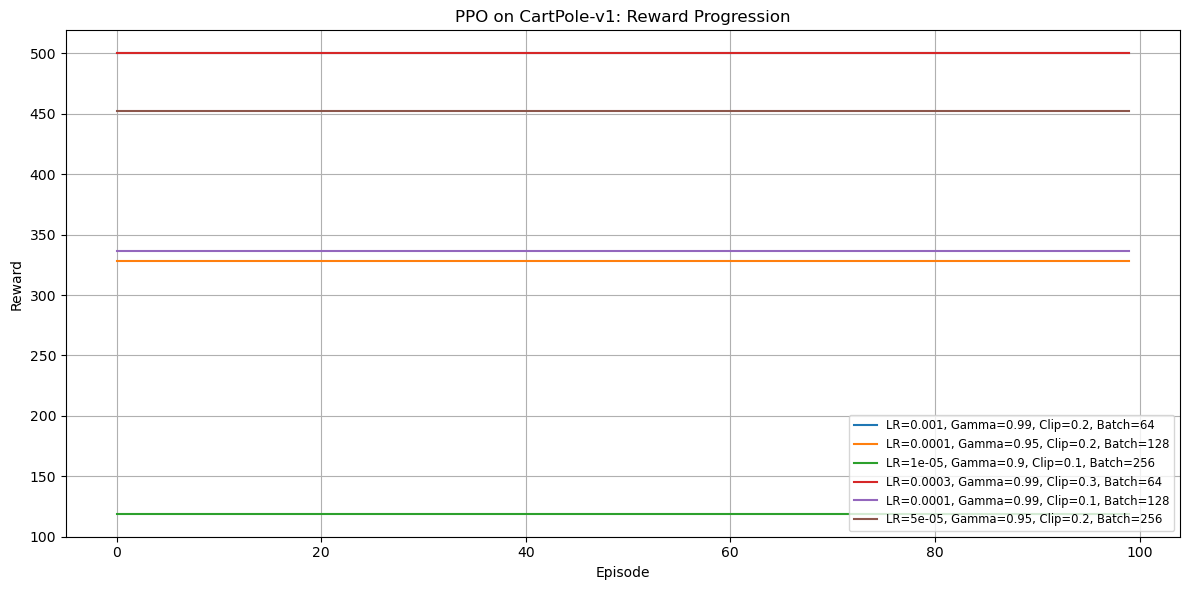

In [7]:
#Plot Results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
max_len = 100  # Shorter for clarity

for result in results:
    # Try to use 'episode_rewards' if available
    rewards = result.get('episode_rewards', [result['mean_reward']] * max_len)
    
    # Truncate or pad rewards for consistent plotting
    if len(rewards) < max_len:
        padded = rewards + [rewards[-1]] * (max_len - len(rewards))
    else:
        padded = rewards[:max_len]

    # Build label from hyperparameters
    hyper = result['hyperparameters']
    label = f"LR={hyper.get('learning_rate', '?')}, " \
            f"Gamma={hyper.get('gamma', '?')}, " \
            f"Clip={hyper.get('clip_range', '?')}, " \
            f"Batch={hyper.get('batch_size', '?')}"
    
    plt.plot(padded, label=label)

plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('PPO on CartPole-v1: Reward Progression')
plt.legend(fontsize='small', loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig(r'C:\Users\hp\Downloads\task9.png', bbox_inches='tight')
plt.show()
